CAPSTONE PROJECT
THIS NOTEBOOK WILL BE MAINLY USED FOR THE CAPSTONE PROJECT FROM IBM DATA SCIENCE PROFESSIONAL CERTIFICATE

Introduction/Business Problem

Banglaore and Mumbai are the major employment centers in India. 

Weather, entertainment options, recreational activities offered by the city, access to healthcare all play a part in choosing one city over the other for relocation.

We will try and assess the plus points and minus points of both these cities in this project.

In [1]:
!conda install -c conda-forge folium --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Tanay\Anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |   py37hc8dfbb8_2         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following packages will be UPDATED:

  conda                                4.8.3-py37hc8dfbb8_1 --> 4.8.4-py37hc8dfbb8_2




conda-4.8.4          | 3.1 MB    |            |   0% 
conda-4.8.4          | 3.1 MB    |            |   1% 
conda-4.8.4          | 3.1 MB    | 9          |   9% 
conda-4.8.4          | 3.1 MB    | ###3       |  34% 
conda-4.8.4          | 3.1 MB    | ####3      |  44% 
conda-4.8.4          | 3.1 MB    | ######9    |  69% 
conda-4.8.4          | 3.1 MB    | #######

In [20]:
#Importing other dependencies

import folium # map rendering library

import numpy as np
import requests
import random
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize  # tranform JSON file into a pandas dataframe
import folium
from folium.plugins import MiniMap
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import json

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn import metrics
# import k-means from clustering stage
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.patches as mpatches
print('Libraries imported.')

Libraries imported.


# Data sourcing and wrangling

Pincode and geometrical coordinates are available on ttp://www.geonames.org/export/zip/. We download the file for India. The file is uploaded to labfolder for easy access.

In [21]:
#importing and examining the data:
import pandas as pd
import csv

import os
base_path = "D:\\Girish\\Coursera Files\\Capstone file" 
# defining path to import the file into Juptyter environment.File is downloaded from internet.

filename = "IN.txt"
path_to_file = os.path.join(base_path, filename)
fd = open(path_to_file , 'r')

crdntsdf=pd.read_csv(fd, sep='\s+', delimiter='\t', header=None)
crdntsdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,IN,744101,Marine Jetty,Andaman & Nicobar Islands,1,South Andaman,NaN,Portblair,NaN,11.6667,92.7500,3
1,IN,744101,Port Blair,Andaman & Nicobar Islands,1,South Andaman,NaN,Port Blair,NaN,11.6667,92.7500,4
2,IN,744101,N.S.Building,Andaman & Nicobar Islands,1,South Andaman,NaN,Portblair,NaN,11.6667,92.7500,3
3,IN,744102,Haddo,Andaman & Nicobar Islands,1,South Andaman,NaN,Port Blair,NaN,11.6833,92.7167,4
4,IN,744102,Chatham,Andaman & Nicobar Islands,1,South Andaman,NaN,Portblair,NaN,11.7000,92.6667,3


In [22]:
#dropping columns not required for our analysis
crdntsdf.drop(crdntsdf.columns[[0,4,6,8,11]], axis=1, inplace=True)

#Assigning column names for the revised df
crdntsdf = crdntsdf.rename(columns = {1:'Pincodes', 2:'Area', 3:'StateUT', 5:'Region',7:'City', 9:'Lat', 10:'Long' })

crdntsdf.head()

,Pincodes,Area,StateUT,Region,City,Lat,Long
0,744101,Marine Jetty,Andaman & Nicobar Islands,South Andaman,Portblair,11.6667,92.7500
1,744101,Port Blair,Andaman & Nicobar Islands,South Andaman,Port Blair,11.6667,92.7500
2,744101,N.S.Building,Andaman & Nicobar Islands,South Andaman,Portblair,11.6667,92.7500
3,744102,Haddo,Andaman & Nicobar Islands,South Andaman,Port Blair,11.6833,92.7167
4,744102,Chatham,Andaman & Nicobar Islands,South Andaman,Portblair,11.7000,92.6667


In [23]:
# We will need the above master dataframe for future reference. Hence saving it as CSV file.
crdntsdf.to_csv('D:\Girish\Coursera Files\Capstone file.csv', index = True)

In [24]:
# Extracting data for Bangalore city from the master datafile
blrdata= crdntsdf[crdntsdf['City'].str.contains('Bangalore', na=False)]

blrdata.head()

,Pincodes,Area,StateUT,Region,City,Lat,Long
50019,560001,Bangalore G.P.O.,Karnataka,Bangalore,Bangalore North,12.9914,77.5944
50020,560001,Legislators Home,Karnataka,Bangalore,Bangalore North,12.9914,77.5944
50022,560001,Mahatma Gandhi Road,Karnataka,Bangalore,Bangalore North,12.9914,77.5944
50023,560001,Vidhana Soudha,Karnataka,Bangalore,Bangalore North,12.9914,77.5944
50024,560001,Rajbhavan (Bangalore),Karnataka,Bangalore,Bangalore North,12.9914,77.5944


In [25]:
blrdata.shape

(258, 7)

In [26]:
# Extracting data for Mumbai city from the master datafile

Mbidata= crdntsdf[crdntsdf['City'].str.contains('Mumbai', na=False)]

Mbidata.head()

,Pincodes,Area,StateUT,Region,City,Lat,Long
36230,400001,Mumbai G.P.O.,Maharashtra,Mumbai,Mumbai,18.6291,72.8919
36231,400001,Bazargate,Maharashtra,Mumbai,Mumbai,18.6291,72.8919
36232,400001,Town Hall (Mumbai),Maharashtra,Mumbai,Mumbai,18.6291,72.8919
36233,400001,Tajmahal,Maharashtra,Mumbai,Mumbai,18.6291,72.8919
36235,400001,Stock Exchange,Maharashtra,Mumbai,Mumbai,18.6291,72.8919


In [27]:
Mbidata.shape

(146, 7)

Inspecting and cleaning the city data frames.

C:\Users\Tanay\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


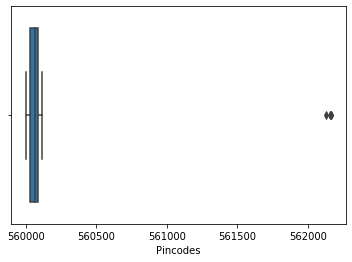

In [28]:
import seaborn as sns
sns.boxplot(x=blrdata['Pincodes'])

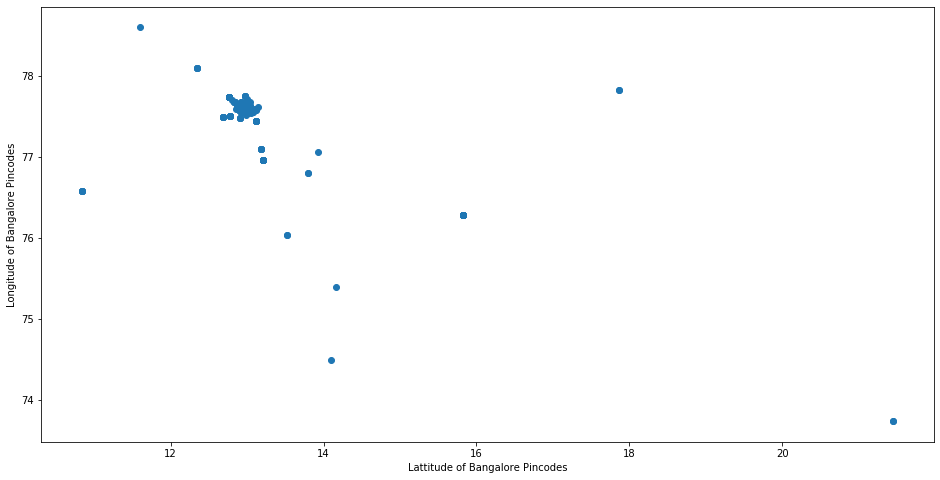

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(blrdata['Lat'], blrdata['Long'])
ax.set_xlabel('Lattitude of Bangalore Pincodes')
ax.set_ylabel('Longitude of Bangalore Pincodes')
plt.show()

Using the inter quartile range, we can identify the outliers and remove them from the dataframe

In [30]:
Q1 = blrdata.quantile(0.25)
Q3 = blrdata.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pincodes    52.75000
Lat          0.10940
Long         0.06635
dtype: float64


In [31]:
Blr_out = blrdata[~((blrdata < (Q1 - 1.5 * IQR)) |(blrdata> (Q3 + 1.5 * IQR))).any(axis=1)]
Blr_out.shape

(182, 7)

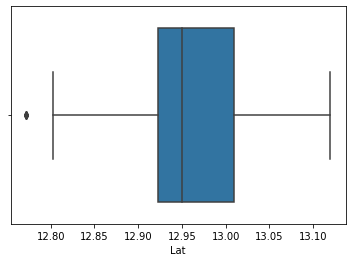

In [32]:
sns.boxplot(x=Blr_out['Lat'])

We can carryout similar operations for Mumbai dataframe.

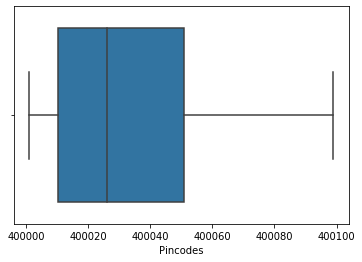

In [33]:
sns.boxplot(x=Mbidata['Pincodes'])

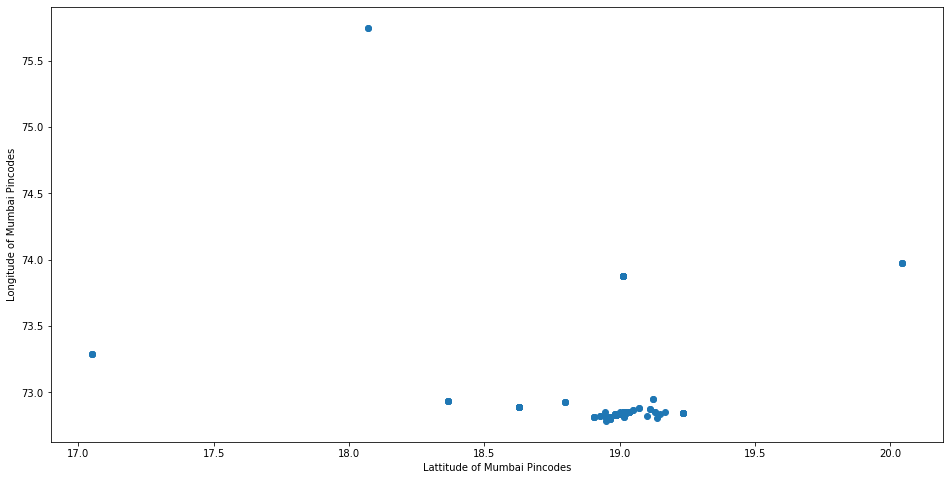

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(Mbidata['Lat'], Mbidata['Long'])
ax.set_xlabel('Lattitude of Mumbai Pincodes')
ax.set_ylabel('Longitude of Mumbai Pincodes')
plt.show()

In [35]:
Q1Mbi = Mbidata.quantile(0.25)
Q3Mbi = Mbidata.quantile(0.75)
IQRMbi = Q3Mbi - Q1Mbi
print(IQRMbi)

Pincodes    40.7500
Lat          0.0667
Long         0.0660
dtype: float64


In [36]:
Mbi_out = Mbidata[~((Mbidata < (Q1Mbi - 1.5 * IQRMbi)) |(Mbidata> (Q3Mbi + 1.5 * IQRMbi))).any(axis=1)]
Mbi_out.shape

(88, 7)

In [64]:
address = 'Bangalore, IN'

geolocator = Nominatim(user_agent="giri")
location = geolocator.geocode(address)
Blr_latitude = location.latitude
Blr_longitude = location.longitude
print('The geograpical coordinate of Bangalore is {}, {}.'.format(Blr_latitude, Blr_longitude))

address1 = 'Mumbai, IN'

location = geolocator.geocode(address1)
Mbi_latitude = location.latitude
Mbi_longitude = location.longitude
print('The geograpical coordinate of Mumbai is {}, {}.'.format(Mbi_latitude, Mbi_longitude))

centerLatitude = (Blr_latitude + Mbi_latitude)/2
centerLongitude = (Blr_longitude + Mbi_longitude)/2

print('\nThe geograpical central coordinates are {}, {}.'.format(centerLatitude, centerLongitude))

The geograpical coordinate of Bangalore is 12.9791198, 77.5912997.
The geograpical coordinate of Mumbai is 18.9387711, 72.8353355.

The geograpical central coordinates are 15.95894545, 75.2133176.


Append Bangalore and Mumbai tables

In [38]:
df = Blr_out.append(Mbi_out, True).reset_index(drop = True)

df.head()

,Pincodes,Area,StateUT,Region,City,Lat,Long
0,560001,Bangalore G.P.O.,Karnataka,Bangalore,Bangalore North,12.9914,77.5944
1,560001,Legislators Home,Karnataka,Bangalore,Bangalore North,12.9914,77.5944
2,560001,Mahatma Gandhi Road,Karnataka,Bangalore,Bangalore North,12.9914,77.5944
3,560001,Vidhana Soudha,Karnataka,Bangalore,Bangalore North,12.9914,77.5944
4,560001,Rajbhavan (Bangalore),Karnataka,Bangalore,Bangalore North,12.9914,77.5944


In [39]:
df.dtypes

Pincodes      int64
Area         object
StateUT      object
Region       object
City         object
Lat         float64
Long        float64
dtype: object

In [40]:
df.shape

(270, 7)

We can observe that total no of observations has come down to 270 rows. Lets plot the map.

Visualize neighborhoods of both cities in a map using Folium

In [41]:
map_giri = folium.Map(location=[centerLatitude, centerLongitude], zoom_start=7, width='100%', height='100%')

for lat, lng, area, region in zip(df['Lat'], df['Long'], df['Area'], df['Region']):
    label = '{}, {}'.format(area, region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_giri)
map_giri

Bangalore City

In [42]:
map_giri = folium.Map(location=[Blr_latitude, Blr_longitude], zoom_start=11, width='100%', height='100%')

for lat, lng, area, region in zip(df['Lat'], df['Long'], df['Area'], df['Region']):
    label = '{}, {}'.format(area, region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_giri)

minimap = MiniMap(position = 'bottomright', center_fixed = (Blr_latitude, Blr_longitude), zoom_level_fixed = 8)
minimap.add_to(map_giri)

minimap = MiniMap(position= 'topleft',  center_fixed = (Mbi_latitude, Mbi_longitude), zoom_level_fixed = 8)
minimap.add_to(map_giri)
map_giri

City of Mumbai

In [43]:
map_giriMbi = folium.Map(location=[Mbi_latitude, Mbi_longitude], zoom_start=11, width='100%', height='100%')

for lat, lng, area, region in zip(df['Lat'], df['Long'], df['Area'], df['Region']):
    label = '{}, {}'.format(area, region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='Red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_giriMbi)

minimap = MiniMap(position = 'bottomright', center_fixed = (Blr_latitude, Blr_longitude), zoom_level_fixed = 8)
minimap.add_to(map_giriMbi)

minimap = MiniMap(position= 'topleft',  center_fixed = (Mbi_latitude, Mbi_longitude), zoom_level_fixed = 8)
minimap.add_to(map_giriMbi)
map_giriMbi

Fetching venue details using google places API.

In [44]:
CLIENT_ID = 'RYH3PDGENWRZR2O4PSDJHAF1YG1GTSBHHOZUEWUCVCHQ4KAX' # your Foursquare ID
CLIENT_SECRET = '1UOPVAQ1VTKADDDI0OIVBUCFKFRJBCBCUGFCRCFPFZ5WPYUZ' # your Foursquare Secret
VERSION = '20180605'
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RYH3PDGENWRZR2O4PSDJHAF1YG1GTSBHHOZUEWUCVCHQ4KAX
CLIENT_SECRET:1UOPVAQ1VTKADDDI0OIVBUCFKFRJBCBCUGFCRCFPFZ5WPYUZ


In [45]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def getVenues(names, Pincodes, latitudes, longitudes, radius=500):
    ind = 1
    venues_list=[]
    for name, Pincode, lat, lng in zip(names, Pincodes, latitudes, longitudes):
        tmp=[]
        print(color.BOLD+str(ind)+" | "+name+color.END)
        ind += 1
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #tmp.append([(j['venue']['name']) for j in results])
        #for item in tmp[0]:
        #    print("\t",item)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            Pincode,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Pincode',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print("\nDone!")
    return(nearby_venues)

In [46]:
Giri_venues= getVenues(names=df['Area'],
                                   Pincodes = df['Pincodes'],
                                   latitudes=df['Lat'],
                                   longitudes=df['Long']
                                  )

1 | Bangalore G.P.O.
2 | Legislators Home
3 | Mahatma Gandhi Road
4 | Vidhana Soudha
5 | Rajbhavan (Bangalore)
6 | HighCourt
7 | Cubban Road
8 | Bangalore Bazaar
9 | CMM Court Complex
10 | Dr. Ambedkar Veedhi
11 | Bangalore City
12 | Bangalore Corporation Building
13 | Sri Jayachamarajendra Road
14 | Palace Guttahalli
15 | Malleswaram
16 | Swimming Pool Extn
17 | Vyalikaval Extn
18 | Basavanagudi
19 | Rajajinagar
20 | Industrial Estate (Bangalore)
21 | Rajajinagar IVth Block
22 | Jalahalli
23 | Seshadripuram
24 | Gayathrinagar
25 | Srirampuram
26 | Magadi Road
27 | Museum Road
28 | Richmond Town
29 | CMP Centre And School
30 | Sampangiramnagar
31 | Wilson Garden
32 | Shanthinagar
33 | Adugodi
34 | R T Nagar
35 | Kanakanagar
36 | P&T Col. Kavalbyrasandra
37 | Maruthi Sevanagar
38 | Agara
39 | Koramangala
40 | Koramangala I Block
41 | St. John's Medical College
42 | Carmelram
43 | Krishnarajapuram
44 | Devasandra
45 | Marathahalli Colony
46 | Doddanekkundi
47 | Yemalur
48 | Rameshnagar
4

In [47]:
# will save this dataframe into csv for future reference:
Giri_venues.to_csv(r'D:\Girish\Coursera Files\Capstone file\Giri_venues.csv')

In [49]:
Giri_venues.shape

(4175, 8)

In [106]:
# one hot encoding
giri_onehot = pd.get_dummies(Giri_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
giri_onehot['Neighborhood'] = Giri_venues['Neighborhood'] 
giri_onehot['Pincode'] = Giri_venues['Pincode']
giri_onehot['Latitude'] = Giri_venues['Neighborhood Latitude']
giri_onehot['Longitude'] = Giri_venues['Neighborhood Longitude']

# move neighborhood column to the first column
fixed_columns = [giri_onehot.columns[-1]] + list(giri_onehot.columns[:-1])
giri_onehot = giri_onehot[fixed_columns]

giri_grouped = giri_onehot.groupby(['Neighborhood','Pincode','Latitude','Longitude']).mean().reset_index()

#print(tony_venues.drop_duplicates(["Neighborhood"],inplace = False)['Neighborhood'].reset_index(drop=True))    
giri_grouped

,Neighborhood,Pincode,Latitude,Longitude,ATM,American Restaurant,Andhra Restaurant,Aquarium,Arcade,Art Gallery,...,Theater,Tibetan Restaurant,Toll Plaza,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store,Yoga Studio,Zoo Exhibit
0,A I Staff Colony,400029,18.9860,72.8259,0.00,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,Adugodi,560030,12.9440,77.6079,0.00,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,Agara,560034,12.9320,77.6227,0.00,0.022727,0.022727,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.022727,0.0
3,Agripada,400011,18.9833,72.8333,0.00,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
4,Ambewadi (Mumbai),400004,18.9500,72.8167,0.00,0.000000,0.000000,0.052632,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.052632,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Worli Police Camp,400030,19.0167,72.8500,0.00,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.076923,0.0,0.0,0.000000,0.0
261,Worli Sea Face,400030,19.0167,72.8500,0.00,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.076923,0.0,0.0,0.000000,0.0
262,Yelachenahalli,560078,12.9020,77.5709,0.00,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
263,Yelahanka,560064,13.1013,77.5963,0.25,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.250000,0.000000,0.0,0.0,0.000000,0.0


In [107]:
giri_grouped.columns.tolist()

['Neighborhood',
 'Pincode',
 'Latitude',
 'Longitude',
 'ATM',
 'American Restaurant',
 'Andhra Restaurant',
 'Aquarium',
 'Arcade',
 'Art Gallery',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Garage',
 'BBQ Joint',
 'Badminton Court',
 'Bakery',
 'Bar',
 'Beach',
 'Bed & Breakfast',
 'Beer Garden',
 'Bistro',
 'Boat or Ferry',
 'Bookstore',
 'Boutique',
 'Bowling Alley',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Buffet',
 'Burger Joint',
 'Bus Station',
 'Bus Stop',
 'Café',
 'Candy Store',
 'Cantonese Restaurant',
 'Chaat Place',
 'Chinese Restaurant',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Concert Hall',
 'Convenience Store',
 'Cosmetics Shop',
 'Creperie',
 'Cupcake Shop',
 'Deli / Bodega',
 'Department Store',
 'Design Studio',
 'Dessert Shop',
 'Diner',
 'Dive Bar',
 'Donut Shop',
 'Eastern European Restaurant',
 'Electronics Store',
 'Farmers Market',
 'Fast Food Restaurant',
 'Film Studio',
 'Financial or Legal Service',

Clustering

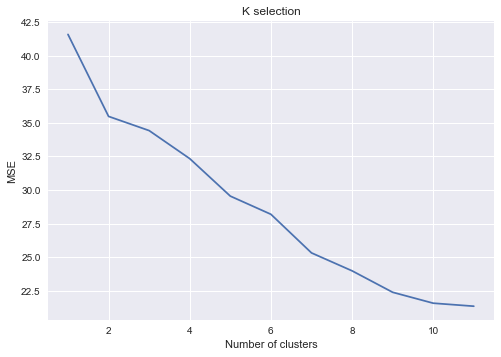

In [108]:
plt.style.use("seaborn")
Ks = 12
mse = np.zeros((Ks-1))
giri_grouped_clustering = giri_grouped.drop(['Neighborhood','Pincode','Latitude','Longitude'],1)
for n in range(1,Ks):
    
    # set number of clusters
    kclusters = n
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0, init = 'random', n_init = 15).fit(giri_grouped_clustering)
    mse[n-1] = kmeans.inertia_

plt.plot(range(1,Ks),mse)
plt.xlabel("Number of clusters")
plt.ylabel("MSE")
plt.title("K selection")
plt.show()

As per the elbow, 2 clusters should be enough. However for sake of granularity and better results, we will maintain 4 clusters

In [111]:
# set number of clusters
kclusters = 4
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0, init = 'random', n_init = 15).fit(giri_grouped_clustering)
    
giri_merged = giri_grouped_clustering

# add clustering labels
giri_merged['Cluster Labels'] = kmeans.labels_

giri_merged

,ATM,American Restaurant,Andhra Restaurant,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Tibetan Restaurant,Toll Plaza,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store,Yoga Studio,Zoo Exhibit,Cluster Labels
0,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0
1,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,3
2,0.00,0.022727,0.022727,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.022727,0.0,0
3,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0
4,0.00,0.000000,0.000000,0.052632,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.052632,0.000000,0.0,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.076923,0.0,0.0,0.000000,0.0,0
261,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.076923,0.0,0.0,0.000000,0.0,0
262,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0
263,0.25,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.250000,0.000000,0.0,0.0,0.000000,0.0,0


Displaying clusters in a map

In [114]:
map_clusters = folium.Map(location=[centerLatitude, centerLongitude], zoom_start=7, width='100%', height='100%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(giri_grouped['Latitude'], giri_grouped['Longitude'], giri_grouped['Neighborhood'],giri_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [115]:
# create map for Bangalore
map_clusters = folium.Map(location=[Blr_latitude, Blr_longitude], zoom_start=11, width='100%', height='100%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(giri_grouped['Latitude'], giri_grouped['Longitude'], 
                                  giri_grouped['Neighborhood'],giri_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       


minimap = MiniMap(position = 'topleft', center_fixed = (Blr_latitude, Blr_longitude), zoom_level_fixed = 8)
minimap.add_to(map_clusters)

minimap = MiniMap(position='bottomright',  center_fixed = (Mbi_latitude, Mbi_longitude), zoom_level_fixed = 8)
minimap.add_to(map_clusters)
map_clusters

In [66]:
# create map for Bangalore
map_clusters = folium.Map(location=[Mbi_latitude, Mbi_longitude], zoom_start=11, width='100%', height='100%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(giri_merged['Neighborhood Latitude'], giri_merged['Neighborhood Longitude'], giri_merged['Neighborhood'], giri_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       


minimap = MiniMap(position = 'topleft', center_fixed = (Mbi_latitude, Mbi_longitude), zoom_level_fixed = 8)
minimap.add_to(map_clusters)

minimap = MiniMap(position='bottomright',  center_fixed = (Blr_latitude, Blr_longitude), zoom_level_fixed = 8)
minimap.add_to(map_clusters)
map_clusters

In [116]:
cl1 = giri_merged.loc[giri_merged['Cluster Labels'] == 0, giri_merged.columns[[0] + list(range(5, giri_merged.shape[1]))]]
cl1


,ATM,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Badminton Court,Bakery,Bar,...,Tibetan Restaurant,Toll Plaza,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store,Yoga Studio,Zoo Exhibit,Cluster Labels
0,0.00,0.0,0.0,0.142857,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0
2,0.00,0.0,0.0,0.000000,0.0,0.0,0.022727,0.000000,0.022727,0.022727,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.022727,0.0,0
3,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.200000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0
4,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.052632,0.000000,...,0.0,0.0,0.0,0.052632,0.000000,0.0,0.0,0.000000,0.0,0
5,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.142857,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0
260,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.076923,0.000000,...,0.0,0.0,0.0,0.000000,0.076923,0.0,0.0,0.000000,0.0,0
261,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.076923,0.000000,...,0.0,0.0,0.0,0.000000,0.076923,0.0,0.0,0.000000,0.0,0
262,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0


In [71]:
cl2 = giri_merged.loc[giri_merged['Cluster Labels'] == 1, giri_merged.columns[[0] + list(range(5, giri_merged.shape[1]))]]
cl2

,Neighborhood,American Restaurant,Andhra Restaurant,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Tibetan Restaurant,Toll Plaza,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store,Yoga Studio,Zoo Exhibit,Cluster Labels
34,Bolare,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
117,Kagalipura,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
227,Somanhalli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
237,Taralu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
239,Thattekuppe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
243,Udaypura,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [75]:
cl3 = giri_merged.loc[giri_merged['Cluster Labels'] == 2, giri_merged.columns[[0] + list(range(5, giri_merged.shape[1]))]]
cl3

,Neighborhood,American Restaurant,Andhra Restaurant,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Tibetan Restaurant,Toll Plaza,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store,Yoga Studio,Zoo Exhibit,Cluster Labels
36,Bommasandra Industrial Estate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
170,Muthanallur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [72]:
cl4 = giri_merged.loc[giri_merged['Cluster Labels'] == 3, giri_merged.columns[[0] + list(range(5, giri_merged.shape[1]))]]
cl4

,Neighborhood,American Restaurant,Andhra Restaurant,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Tibetan Restaurant,Toll Plaza,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store,Yoga Studio,Zoo Exhibit,Cluster Labels
1,Adugodi,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,3
12,B Sk II Stage,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,3
13,Bagalgunte,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,3
17,Bangalore Bazaar,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,3
20,Bangalore G.P.O.,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Vidhana Soudha,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,3
254,West of Chord Road II stage,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,3
255,Wilson Garden,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,3
256,Wipro Limited,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.166667,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,3


In [76]:
cl5 = giri_merged.loc[giri_merged['Cluster Labels'] == 4, giri_merged.columns[[0] + list(range(5, giri_merged.shape[1]))]]
cl5

,Neighborhood,American Restaurant,Andhra Restaurant,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Tibetan Restaurant,Toll Plaza,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store,Yoga Studio,Zoo Exhibit,Cluster Labels


Data Visualisation

In [77]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (categories[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]
    #print(values_cumsum)

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        #color_val = colormap((float(values_cumsum[i])/total_values))
        color_val = colormap(np.linspace(0,1,5)[i])
        #print(np.arange(1,6)[i]/5)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Total number of tiles is 400
Cluster I: 264
Cluster II: 9
Cluster III: 3
Cluster IV: 124


<Figure size 576x396 with 0 Axes>

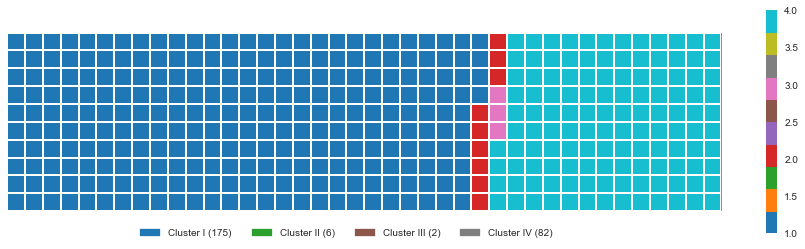

In [95]:
index = ['Cluster I', 'Cluster II', 'Cluster III', 'Cluster IV'] # excluding cluster V since it has 0 values
portions = [cl1.shape[0], cl2.shape[0], cl3.shape[0], cl4.shape[0]]
width = 40 # width of chart
height = 10 # height of chart

categories = index # categories
values = portions # correponding values of categories

colormap = plt.cm.tab10# color map class
create_waffle_chart(categories, values, height, width, colormap)

Bar Charts

In [101]:
tmp = np.zeros((kmeans.cluster_centers_.shape))
tmp[0,:] = kmeans.cluster_centers_[3,:]
tmp[1,:] = kmeans.cluster_centers_[0,:]
tmp[2,:] = kmeans.cluster_centers_[2,:]
tmp[3,:] = kmeans.cluster_centers_[1,:]
maxi = []
for i in range(4):
    maxi.extend(tmp[i,:].argsort()[-3:][::-1])
    
args = np.asarray(list(set(maxi)))
table = pd.DataFrame(data = tmp[:,args.astype(int)], index = ['Cluster I', 'Cluster II', 'Cluster III', 'Cluster IV'],
                                                              columns = giri_grouped_clustering.columns[args.astype(int)])
table = table.transpose()

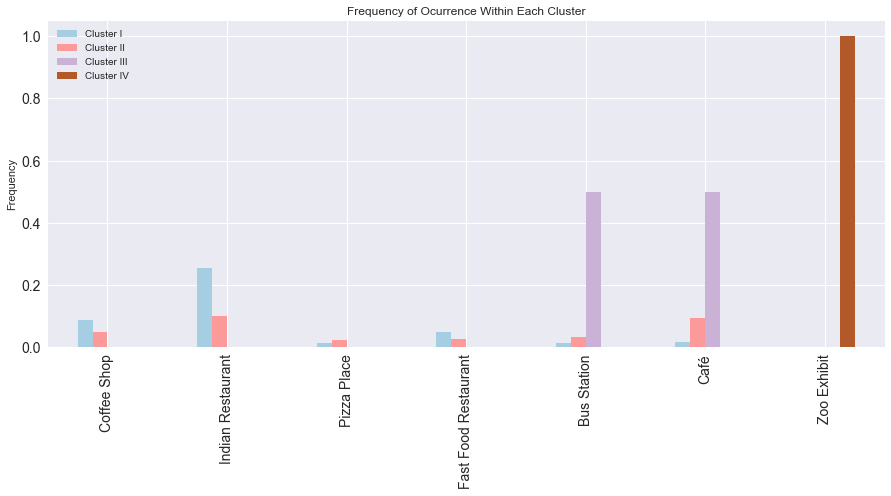

In [102]:
plt.style.use('seaborn')
ax = table.plot(kind='bar', figsize=(15,6), rot=90, fontsize = 14, colormap = 'Paired')
bars = ax.get_children()
plt.title("Frequency of Ocurrence Within Each Cluster")
plt.ylabel("Frequency")

plt.show()

In [103]:
maxi = []
for i in range(4):
    maxi.extend(tmp[i,:].argsort()[-3:][::-1])
    
args = np.asarray(list(set(maxi)))
table = pd.DataFrame(data = tmp[:,args.astype(int)], index = ['Cluster I', 'Cluster II', 'Cluster III', 'Cluster IV'], 
                     columns = giri_grouped_clustering.columns[args.astype(int)])
table = table.T
table.drop(["Zoo Exhibit"], inplace= True)

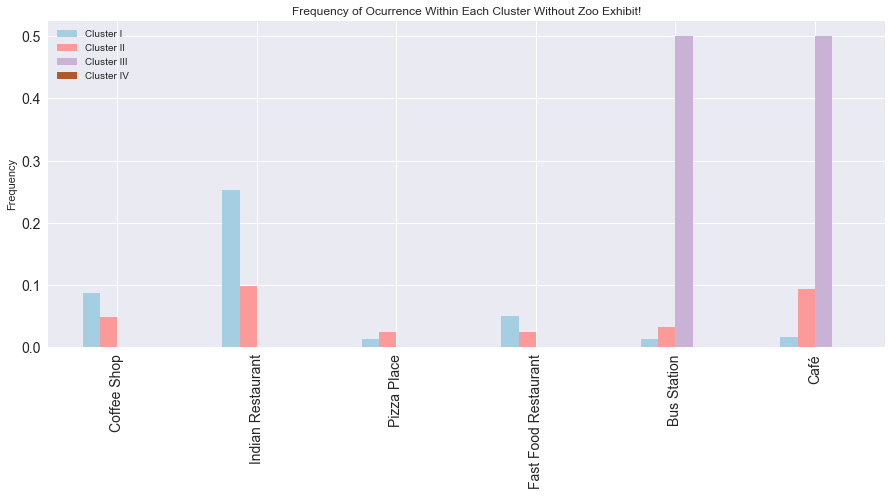

In [117]:
plt.style.use('seaborn')
ax = table.plot(kind='bar', figsize=(15,6), rot=90, fontsize = 14, colormap = "Paired")
bars = ax.get_children()
plt.title("Frequency of Ocurrence Within Each Cluster Without Zoo Exhibit!")
plt.ylabel("Frequency")
plt.show()

Conclusion:
Both cities are dotted with amenities necessary for modern lifestyle. Neighborhoods falling in cluster 3 in both cities offer largest number of amenities. A person can choose neighborhoods based on paygrade, rentals withn cluster 3.